# Denoising and binarization
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

## Reading image

**Example image**

In [2]:
img = './im.jpeg'
im = cv2.imread(img)

## Denoising

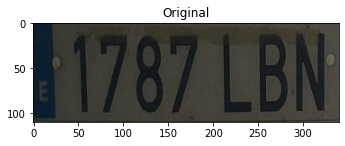

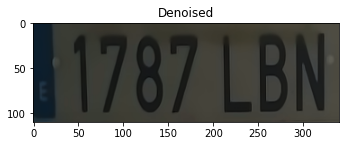

In [29]:
b,g,r = cv2.split(im)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

dst = cv2.fastNlMeansDenoisingColored(im,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

plt.subplot(211),plt.imshow(rgb_img)
plt.title("Original")
plt.show()
plt.subplot(211),plt.imshow(rgb_dst)
plt.title("Denoised")
plt.show()

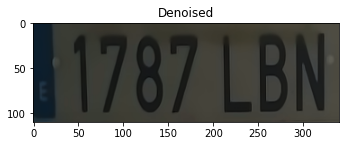

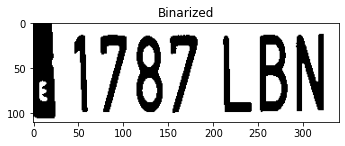

In [30]:
maxval = 255
thresh = 40
im_gray = cv2.cvtColor(rgb_dst, cv2.COLOR_BGR2GRAY)
im_bin = (im_gray > thresh) * maxval
im_bin = im_bin.astype(np.uint8)

plt.subplot(211),plt.imshow(rgb_dst)
plt.title("Denoised")
plt.show()
plt.subplot(211),plt.imshow(im_bin, cmap='gray', vmin=0, vmax=255)
plt.title("Binarized")
plt.show()